Dieses Skript visualisiert einen einzigen EEG Kanal und die dazugehörigen Artefakte.

[4.79980443e+03 4.79339575e+03 4.80850193e+03 ... 3.50000000e-03
 3.50000000e-03 3.50000000e-03]


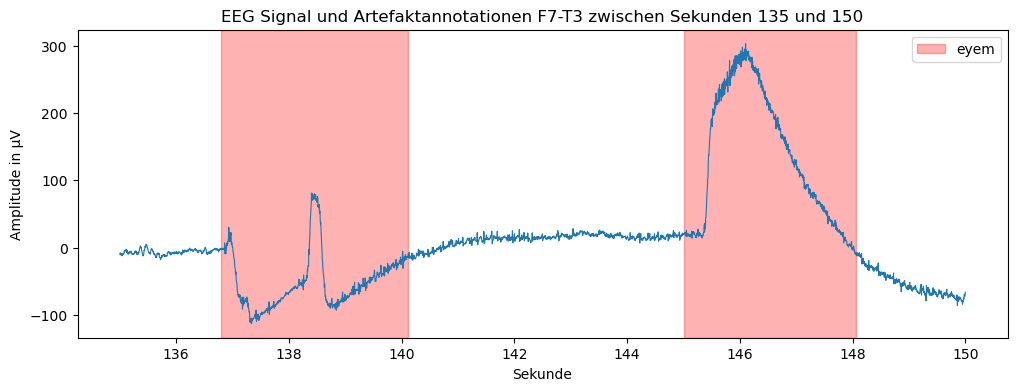

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pyedflib
import numpy as np
import pandas as pd

sample_edf = "../../../../tuar/edf/01_tcp_ar/aaaaaaju_s005_t000.edf"
sample_csv = "../../../../tuar/edf/01_tcp_ar/aaaaaaju_s005_t000.csv"

idx_f7 = 10
idx_t3 = 12

reader = pyedflib.EdfReader(sample_edf)

signal_f7_t3 = reader.readSignal(idx_f7) - reader.readSignal(idx_t3)
sampling_frequency = reader.getSampleFrequency(idx_f7)

reader.close()

df = pd.read_csv(sample_csv, comment='#')
df = df.query("channel == 'F7-T3' and start_time > 135 and stop_time < 150")

# Define lower and upper bound for seconds 135-150
lower_bound = int(135 * sampling_frequency)
upper_bound = int(150 * sampling_frequency)

plt.figure(figsize=(12, 4))
plt.title("EEG Signal und Artefaktannotationen F7-T3 zwischen Sekunden 135 und 150")
plt.xlabel("Sekunde")
plt.ylabel("Amplitude in µV")
plt.plot(np.arange(lower_bound, upper_bound) / sampling_frequency, signal_f7_t3[lower_bound:upper_bound], linewidth=0.8)

for row in df.itertuples():
    plt.axvspan(row.start_time, row.stop_time, color='red', alpha=0.3, label=row.label)

legend_handle = [Patch(facecolor='red', alpha=0.3, label='eyem', edgecolor='red')]
plt.legend(handles=legend_handle)

plt.savefig("./output/exp_01_05_eeg_artifact_annotation.svg")
plt.show()


In [11]:
reader.close()